<a href="https://colab.research.google.com/github/tranborg30/test4/blob/master/Iris_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a very basic tutorial to Machine Learning for complete Beginners using the Iris Dataset.

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/Iris.csv"]).decode("utf8"))


/Iris.csv



In [12]:
iris = pd.read_csv("/Iris.csv")  # load dataset
iris.head() # show first 5 rows of dataset 


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.info()
#checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
iris.drop('Id', axis=1, inplace=True)
#dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe

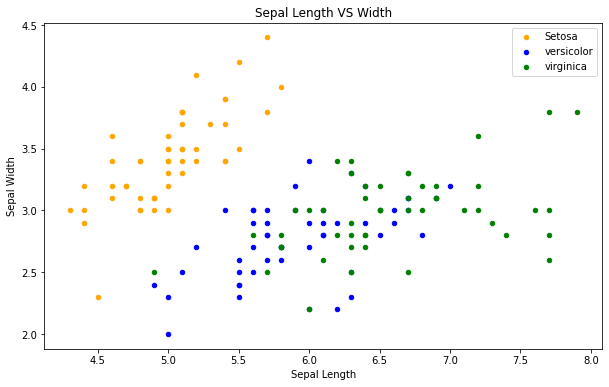

In [14]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor', ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf() # get current figure
fig.set_size_inches(10,6) # set figure size in inches (w, h)
plt.show()

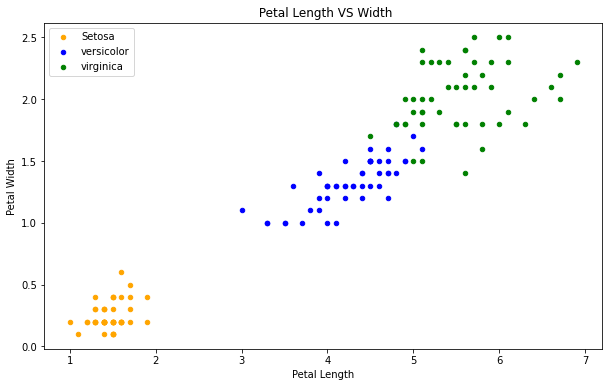

In [15]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [ ]:
#As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. 
#This is an indication that the Petals can help in better and accurate Predictions over the Sepal. 
#We will check that later.

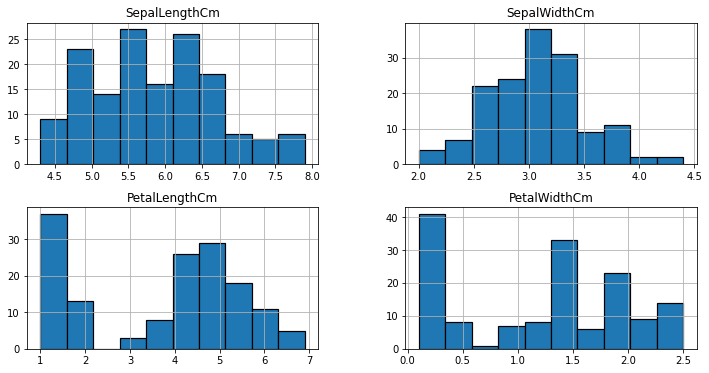

In [17]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

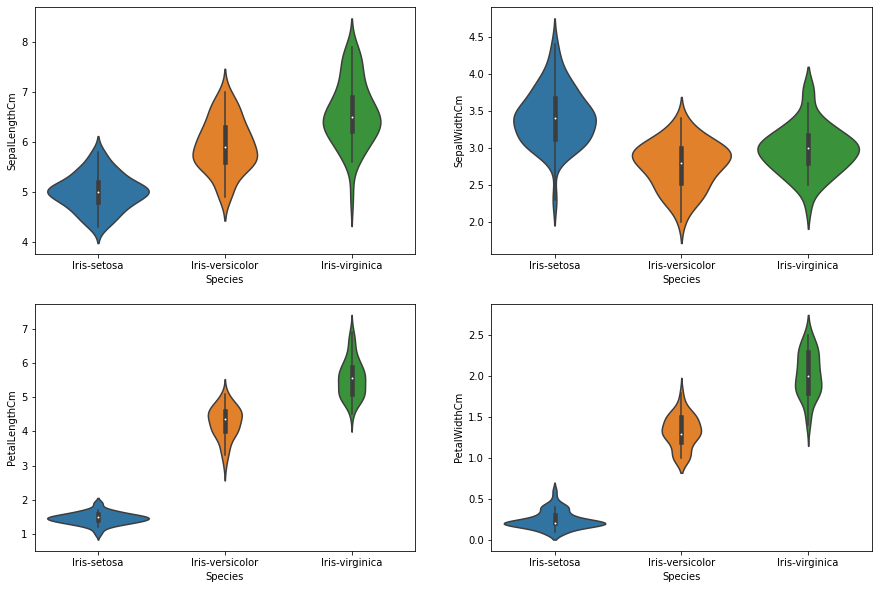

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y='SepalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y='SepalWidthCm', data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
#The violinplot shows density of the length and width in the species. 
#The thinner part denotes that there is less density whereas the fatter part conveys higher density


In [ ]:
#Now the given problem is a classification problem.. 
#Thus we will be using the classification algorithms to build a model.

In [20]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [21]:
iris.shape #get the shape of the dataset 

(150, 5)

In [ ]:
#Now, when we train any algorithm, the number of features and their correlation plays an important role. 
#If there are features and many of the features are highly correlated, 
#then training an algorithm with all the featues will reduce the accuracy. 
#Thus features selection should be done carefully. 
#This dataset has less featues but still we will see the correlation.

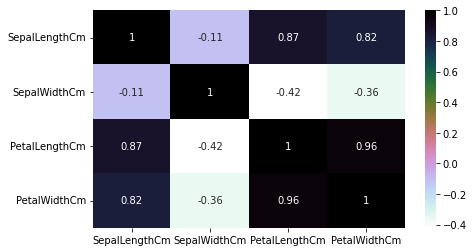

In [25]:
plt.figure(figsize=(7,4)) # size of figure (w,h)
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as the correlation matrix calculated by (iris.corr())
plt.show()

In [ ]:
#The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated
#We will use all the features for training the algorithm and check the accuracy.
#Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. 
#Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.


In [ ]:
#Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
#Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
#Then pass the training dataset to the algorithm to train it. We use the .fit() method
#Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
#We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [26]:
from matplotlib import test
train, test = train_test_split(iris, test_size=0.3) # in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [27]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species # output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y=test.Species

In [30]:
train_X.head(2) # check train dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
133,6.3,2.8,5.1,1.5
122,7.7,2.8,6.7,2.0


In [31]:
test_X.head(2) # check test dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
30,4.8,3.1,1.6,0.2
83,6.0,2.7,5.1,1.6


In [33]:
train_y.head(8) # output of the training data

133     Iris-virginica
122     Iris-virginica
147     Iris-virginica
103     Iris-virginica
99     Iris-versicolor
140     Iris-virginica
14         Iris-setosa
40         Iris-setosa
Name: Species, dtype: object

In [35]:
# Support Vector Machine (SVM) algoritme

model = svm.SVC() # select the algoritm
model.fit(train_X, train_y) # we train the algoritm with the training data and the training output 
prediction = model.predict(test_X) # now we pass the testing data to the trained algoritm
print('The accuracy of the algoritm is:', metrics.accuracy_score(prediction,test_y)) #now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the algoritm is: 0.8888888888888888


In [36]:
# Logistic Regression algoritm

model = LogisticRegression() # select algoritm
model.fit(train_X, train_y) # train the algoritm
prediction=model.predict(test_X) # pass test data to the trained algoritm 
print('The accuracy of the logistic Regression is:', metrics.accuracy_score(prediction, test_y))


The accuracy of the logistic Regression is: 0.9111111111111111


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [37]:
# Decision Tree algoritm

model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.8666666666666667


In [43]:
# K-Nearest Neighbours

model=KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9111111111111111


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


([<matplotlib.axis.XTick at 0x7f7365b33ed0>,
 <a list of 10 Text major ticklabel objects>)

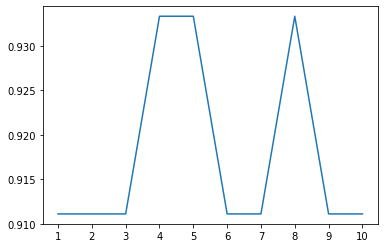

In [42]:
#Let's check the accuracy for various values of n for K-Nearest nerighbours

a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

In [45]:
#We used all the features of iris in above models. Now we will use Petals and Sepals Seperately
#Creating Petals And Sepals Training Data

petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

train_p, test_p=train_test_split(petal, test_size=0.3, random_state=0)
#petal
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species

train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species


In [46]:
# SVM algoritm

model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


In [47]:
# Logistic Regression algoritm 

model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [48]:
# Decision Tree

model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


In [49]:
# K-Nearest Neighbours

model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


Observations:
Using Petals over Sepal for training the data gives a much better accuracy.
This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.


Thus we have just implemented some of the common Machine Learning. Since the dataset is small with very few features, I didn't cover some concepts as they would be relevant when we have many features.
